# Importing necessary Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
import missingno as msno

## Loading the data

In [ ]:
df1=pd.read_csv("Dataset_scenario_1.csv")
df2=pd.read_csv("Dataset_scenario_2.csv")
df3=pd.read_csv("Dataset_scenario_3.csv")
df4=pd.read_csv("Dataset_scenario_4.csv")

all_dfs = [df1, df2, df3, df4]
combined_df = pd.concat(all_dfs, ignore_index=True)
combined_df

,Measurenent,Id_sensor,Number_data,Temperature,Humidity,Soil_humidity,Rssi
0,1,2,1,25.8,82.0,0.00,-86
1,2,1,1,25.3,86.0,0.00,-86
2,3,1,2,25.6,86.0,0.00,-91
3,4,2,2,25.7,82.0,0.00,-94
4,5,1,3,26.3,83.0,0.00,-86
...,...,...,...,...,...,...,...
763,188,1,94,32.1,67.0,32.87,-82
764,189,2,95,32.8,67.0,32.24,-75
765,190,1,95,33.1,63.0,32.83,-81
766,191,2,96,33.8,63.0,33.40,-76


In [ ]:
combined_df.describe()

,Measurenent,Id_sensor,Number_data,Temperature,Humidity,Soil_humidity,Rssi
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,96.500000,1.500000,48.500000,25.771745,82.384115,5.955404,-80.792969
std,55.460993,0.500326,27.729368,5.731629,16.463055,14.459850,9.656154
min,1.000000,1.000000,1.000000,18.500000,30.000000,0.000000,-101.000000
25%,48.750000,1.000000,24.750000,21.800000,73.000000,0.000000,-89.000000
50%,96.500000,1.500000,48.500000,23.150000,93.000000,0.000000,-81.000000
75%,144.250000,2.000000,72.250000,28.925000,94.000000,0.000000,-74.000000
max,192.000000,2.000000,96.000000,45.200000,96.000000,77.590000,-57.000000


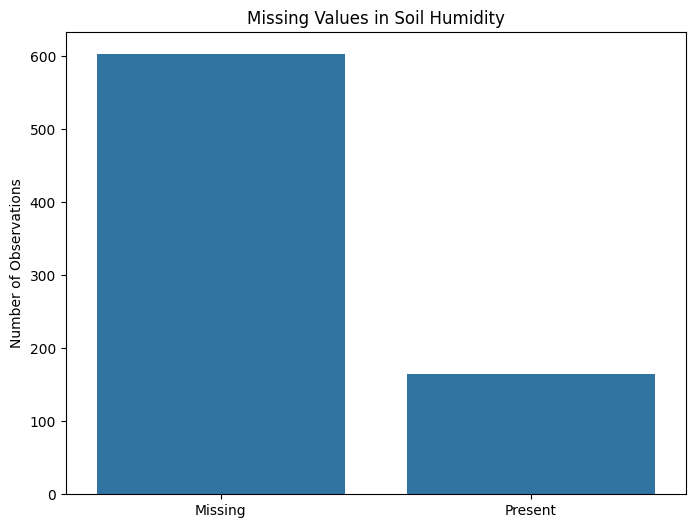

Number of missing values in Soil_humidity: 603


In [ ]:
# Replace 0 in 'Soil_humidity' with NaN to represent missing values
combined_df['Soil_humidity'] = combined_df['Soil_humidity'].replace(0, np.nan)

# --- 1. Initial Data Exploration and Visualization ---

# a) Missing Data Visualization
plt.figure(figsize=(8, 6))
sns.barplot(x=['Missing', 'Present'], y=[combined_df['Soil_humidity'].isnull().sum(), combined_df['Soil_humidity'].notnull().sum()])
plt.title('Missing Values in Soil Humidity')
plt.ylabel('Number of Observations')
plt.show()
print(f"Number of missing values in Soil_humidity: {combined_df['Soil_humidity'].isnull().sum()}")

### Distribution of numerical features

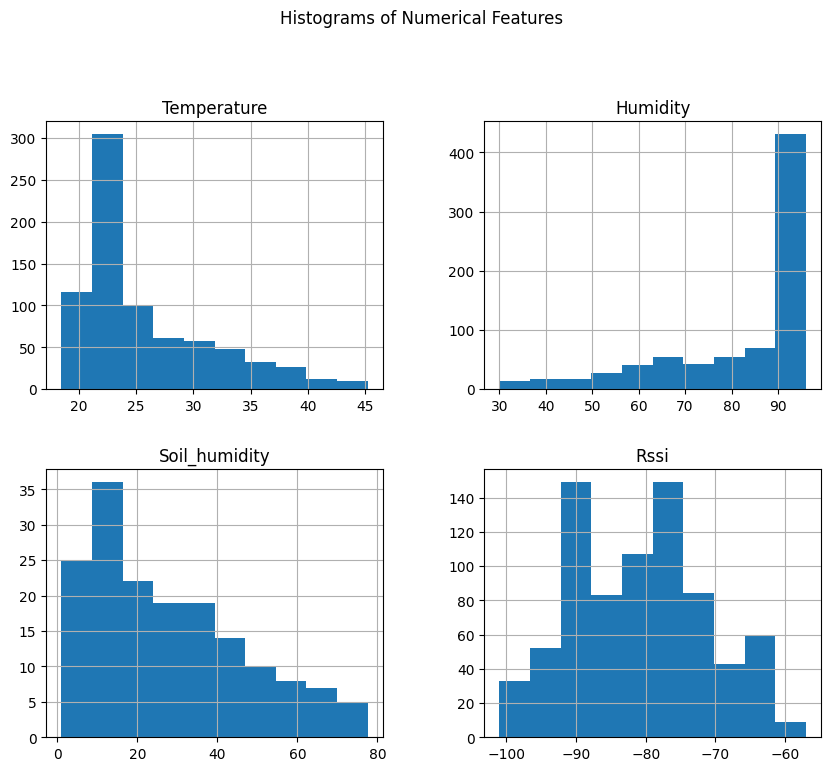

In [ ]:
# b) Distribution of Numerical Features
numerical_cols = ['Temperature', 'Humidity', 'Soil_humidity', 'Rssi']
combined_df[numerical_cols].hist(figsize=(10, 8)) # Changed df to combined_df
plt.suptitle('Histograms of Numerical Features', y=1.02)
plt.show()


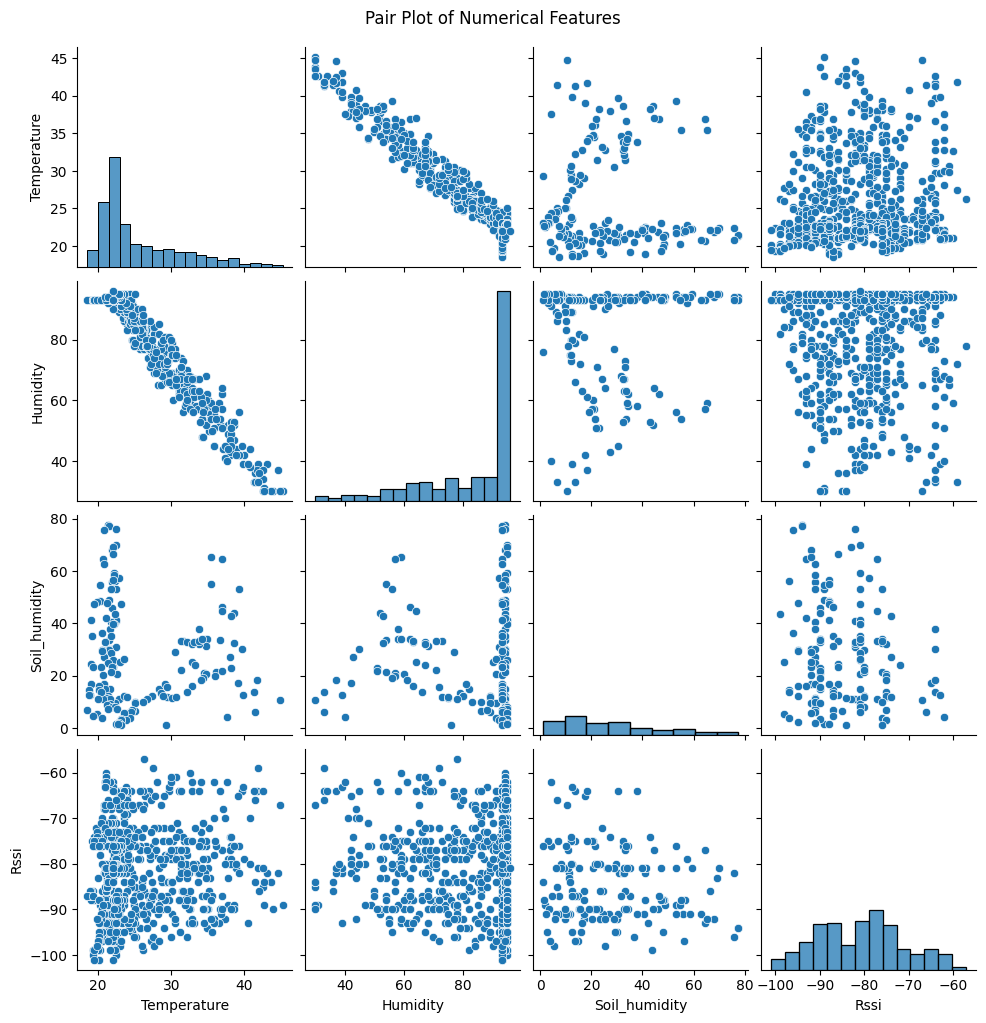

In [ ]:
# c) Pair Plots
sns.pairplot(combined_df[numerical_cols])
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()

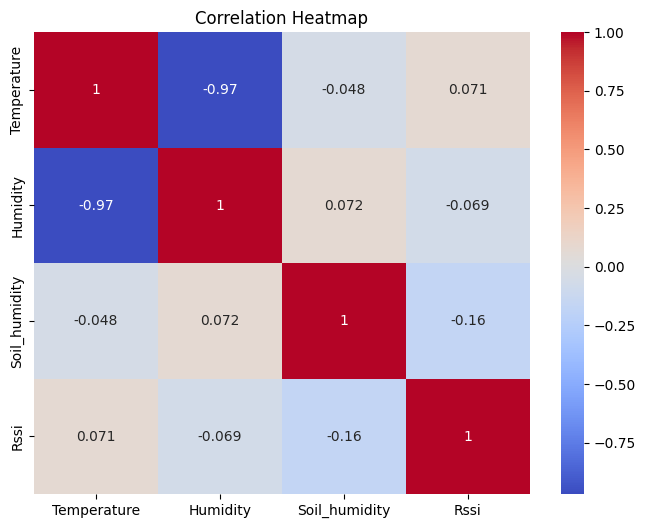

In [ ]:
# d) Correlation Heatmap
correlation_matrix = combined_df[numerical_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

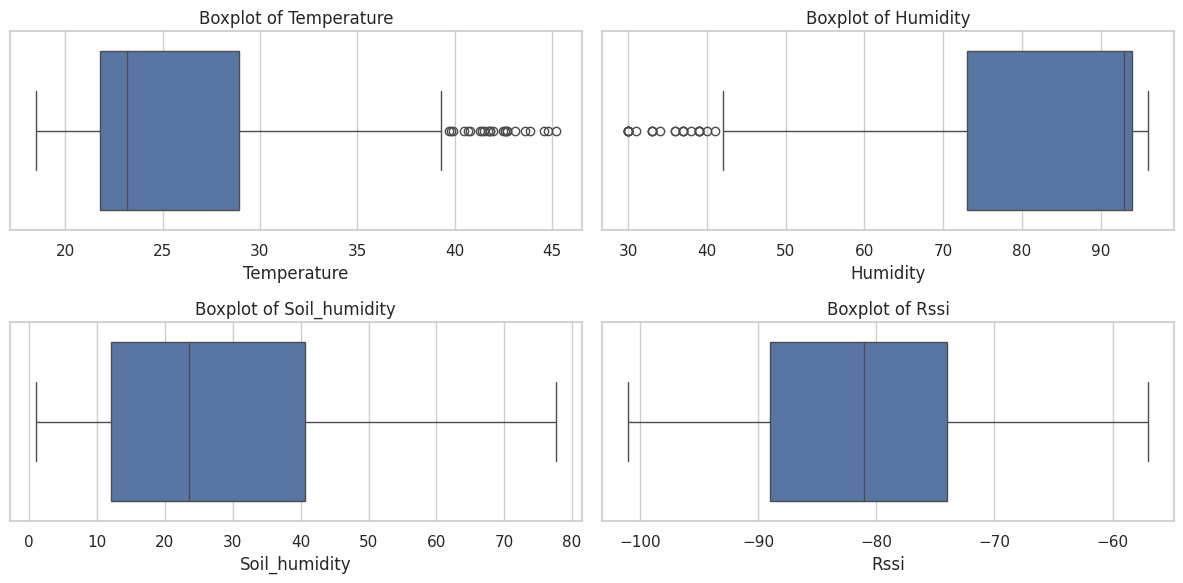

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of relevant columns
variables = ['Temperature', 'Humidity', 'Soil_humidity', 'Rssi']

# Set style
sns.set(style="whitegrid")

# Plot each as a box plot
plt.figure(figsize=(12, 6))
for i, var in enumerate(variables, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=combined_df[var])
    plt.title(f'Boxplot of {var}')
plt.tight_layout()
plt.show()

In [ ]:
# --- 2. Data Preparation for Modeling ---

# Select features (excluding 'Measurement' and potentially 'Id_sensor' if not encoded)
features = ['Temperature', 'Humidity', 'Rssi']
target = 'Soil_humidity'

df_not_na = combined_df.dropna(subset=[target]).copy()
df_missing = combined_df[combined_df[target].isnull()].copy()

X = df_not_na[features]
y = df_not_na[target]

# Split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Features for imputation (scaled)
X_impute = df_missing[features]
X_impute_scaled = scaler.transform(X_impute)

# --- 3. Model Training and Evaluation ---

results = {}
imputed_dfs = {}

## Linear regression

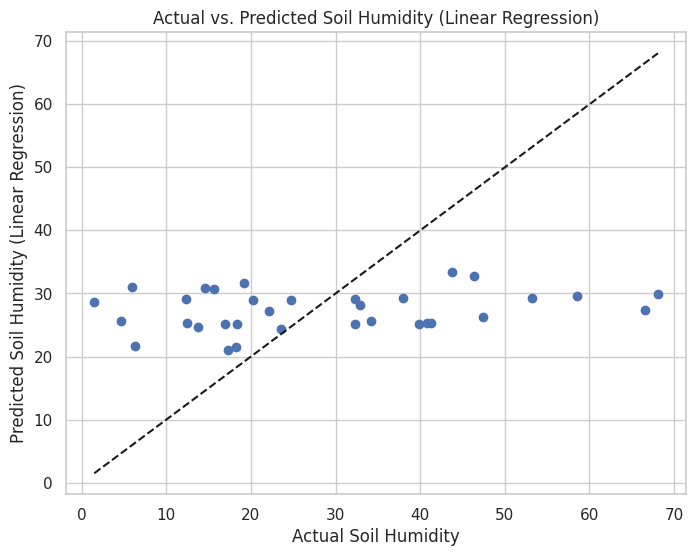

In [ ]:
# --- Linear Regression ---
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)
linear_predictions = linear_model.predict(X_test_scaled)
linear_mse = mean_squared_error(y_test, linear_predictions)
linear_r2 = r2_score(y_test, linear_predictions)
results['Linear Regression'] = {'MSE': linear_mse, 'R-squared': linear_r2}

# Impute missing values using Linear Regression
linear_imputed_values = linear_model.predict(X_impute_scaled)
df_missing['Soil_humidity_imputed_linear'] = linear_imputed_values
imputed_dfs['Linear Regression'] = df_missing.copy()

# Visualization: Actual vs. Predicted (Linear Regression)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, linear_predictions)
plt.xlabel('Actual Soil Humidity')
plt.ylabel('Predicted Soil Humidity (Linear Regression)')
plt.title('Actual vs. Predicted Soil Humidity (Linear Regression)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.show()

#  K-Nearest Neighbors (KNN)

In [ ]:
# --- K-Nearest Neighbors (KNN) ---
knn_model = KNeighborsRegressor(n_neighbors=5) # You can experiment with different values of n_neighbors
knn_model.fit(X_train_scaled, y_train)
knn_predictions = knn_model.predict(X_test_scaled)
knn_mse = mean_squared_error(y_test, knn_predictions)
knn_r2 = r2_score(y_test, knn_predictions)
results['KNN'] = {'MSE': knn_mse, 'R-squared': knn_r2}

# Impute missing values using KNN
knn_imputed_values = knn_model.predict(X_impute_scaled)
df_missing['Soil_humidity_imputed_knn'] = knn_imputed_values
imputed_dfs['KNN'] = df_missing.copy()

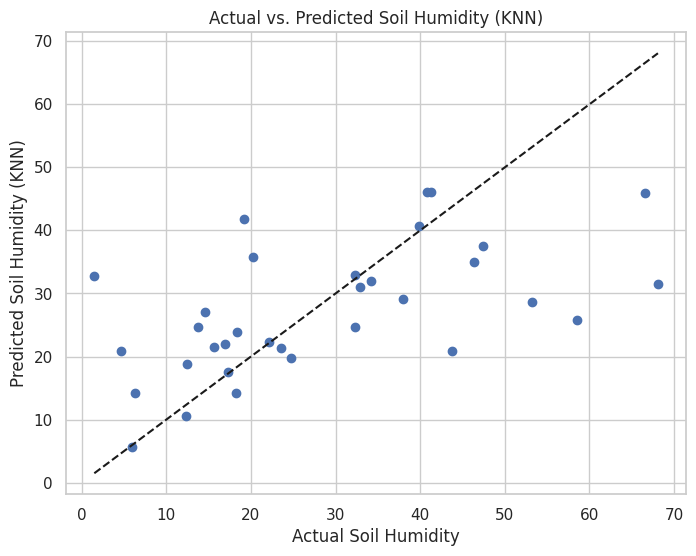

In [ ]:
# Visualization: Actual vs. Predicted (KNN)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, knn_predictions)
plt.xlabel('Actual Soil Humidity')
plt.ylabel('Predicted Soil Humidity (KNN)')
plt.title('Actual vs. Predicted Soil Humidity (KNN)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.show()

#  Random Forest Regressor

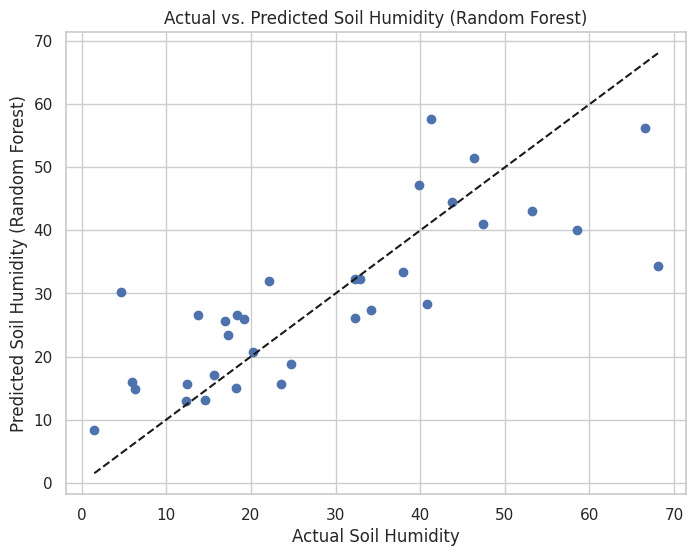

In [ ]:
# --- Random Forest Regressor ---
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train) # Random Forest can handle unscaled data

rf_predictions = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)
results['Random Forest'] = {'MSE': rf_mse, 'R-squared': rf_r2}

# Impute missing values using Random Forest
rf_imputed_values = rf_model.predict(X_impute)
df_missing['Soil_humidity_imputed_rf'] = rf_imputed_values
imputed_dfs['Random Forest'] = df_missing.copy()

# Visualization: Actual vs. Predicted (Random Forest)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, rf_predictions)
plt.xlabel('Actual Soil Humidity')
plt.ylabel('Predicted Soil Humidity (Random Forest)')
plt.title('Actual vs. Predicted Soil Humidity (Random Forest)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.show()

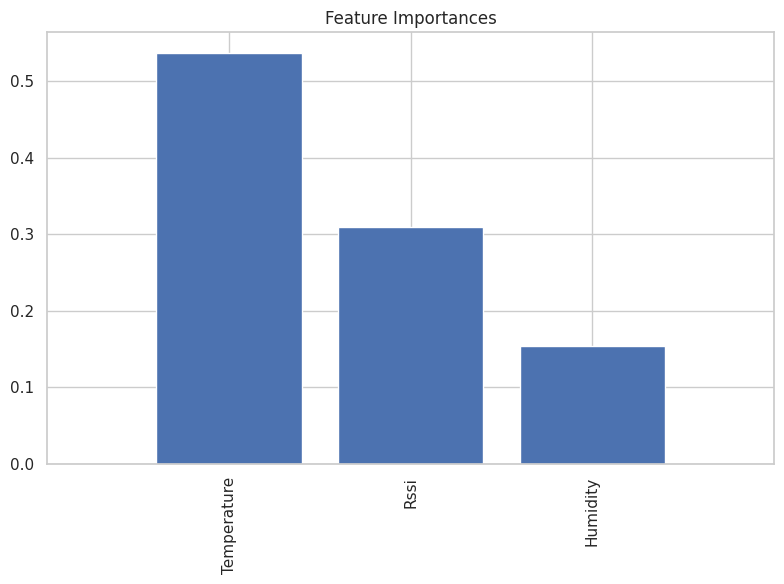

In [ ]:
# Visualization: Feature Importance (Random Forest)
feature_importances = rf_model.feature_importances_
feature_names = X.columns
sorted_indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(8, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), feature_importances[sorted_indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[sorted_indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.show()

In [ ]:
# --- 4. Display Model Performance ---
print("\nModel Performance:")
for model, metrics in results.items():
    print(f"{model}: MSE = {metrics['MSE']:.4f}, R-squared = {metrics['R-squared']:.4f}")


Model Performance:
Linear Regression: MSE = 290.9329, R-squared = 0.0540
KNN: MSE = 209.1830, R-squared = 0.3198
Random Forest: MSE = 115.6841, R-squared = 0.6238


## Roc curve and Accuracy

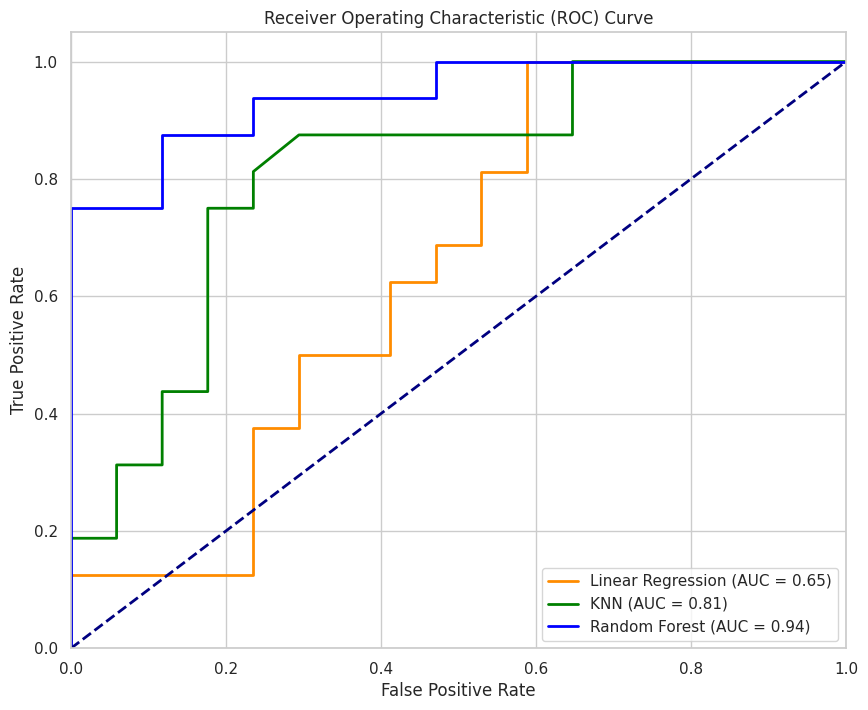


Accuracy (based on binary classification at threshold 23.5 ):
Linear Regression Accuracy: 0.5758
KNN Accuracy: 0.7576
Random Forest Accuracy: 0.7879


In [ ]:

# Let's define a threshold for Soil_humidity. For example, we can use the median or mean.
threshold = y_test.median()
# Or: threshold = y_test.mean()

# Convert actual values to binary classes
y_test_binary = (y_test > threshold).astype(int)

# Convert predictions to binary classes for each model based on the same threshold
linear_predictions_binary = (linear_predictions > threshold).astype(int)
knn_predictions_binary = (knn_predictions > threshold).astype(int)
rf_predictions_binary = (rf_predictions > threshold).astype(int)

# --- Generate ROC curves ---
plt.figure(figsize=(10, 8))

# Linear Regression ROC
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test_binary, linear_predictions) # Using continuous predictions for ROC
roc_auc_lr = auc(fpr_lr, tpr_lr)
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label=f'Linear Regression (AUC = {roc_auc_lr:.2f})')

# KNN ROC
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test_binary, knn_predictions) # Using continuous predictions for ROC
roc_auc_knn = auc(fpr_knn, tpr_knn)
plt.plot(fpr_knn, tpr_knn, color='green', lw=2, label=f'KNN (AUC = {roc_auc_knn:.2f})')

# Random Forest ROC
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test_binary, rf_predictions) # Using continuous predictions for ROC
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')

# Plot the diagonal line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# --- Display Accuracy for each method (based on binary classification) ---
from sklearn.metrics import accuracy_score

print("\nAccuracy (based on binary classification at threshold", threshold, "):")
accuracy_lr = accuracy_score(y_test_binary, linear_predictions_binary)
print(f"Linear Regression Accuracy: {accuracy_lr:.4f}")

accuracy_knn = accuracy_score(y_test_binary, knn_predictions_binary)
print(f"KNN Accuracy: {accuracy_knn:.4f}")

accuracy_rf = accuracy_score(y_test_binary, rf_predictions_binary)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")


# 5. Create New Datasets with Imputed Missing Values

### Linear Regression Imputed Dataset

In [ ]:
# Linear Regression Imputed Dataset
df_linear_imputed = combined_df.copy()
df_linear_imputed.loc[df_linear_imputed['Soil_humidity'].isnull(), 'Soil_humidity'] = imputed_dfs['Linear Regression']['Soil_humidity_imputed_linear'].values
print("\nDataset with Linear Regression Imputed Soil Humidity (first 5 rows):")
print(df_linear_imputed.head())
df_linear_imputed.to_csv('df_linear_imputed.csv', index=False)
print("\nDataset with Linear Regression Imputed Soil Humidity (first 5 rows) saved to 'df_linear_imputed.csv' in the current directory.")


Dataset with Linear Regression Imputed Soil Humidity (first 5 rows):
   Measurenent  Id_sensor  Number_data  Temperature  Humidity  Soil_humidity  \
0            1          2            1         25.8      82.0      27.892484   
1            2          1            1         25.3      86.0      28.157855   
2            3          1            2         25.6      86.0      30.685184   
3            4          2            2         25.7      82.0      31.550119   
4            5          1            3         26.3      83.0      28.374874   

   Rssi  
0   -86  
1   -86  
2   -91  
3   -94  
4   -86  

Dataset with Linear Regression Imputed Soil Humidity (first 5 rows) saved to 'df_linear_imputed.csv' in the current directory.


### KNN Imputed Dataset

In [ ]:
# KNN Imputed Dataset
df_knn_imputed = combined_df.copy()
df_knn_imputed.loc[df_knn_imputed['Soil_humidity'].isnull(), 'Soil_humidity'] = imputed_dfs['KNN']['Soil_humidity_imputed_knn'].values
print("\nDataset with KNN Imputed Soil Humidity (first 5 rows):")
print(df_knn_imputed.head())
df_knn_imputed.to_csv('df_knn_imputed.csv', index=False)
print("\nDataset with KNN Imputed Soil Humidity (first 5 rows) saved to 'df_knn_imputed.csv' in the current directory.")


Dataset with KNN Imputed Soil Humidity (first 5 rows):
   Measurenent  Id_sensor  Number_data  Temperature  Humidity  Soil_humidity  \
0            1          2            1         25.8      82.0         12.270   
1            2          1            1         25.3      86.0          8.674   
2            3          1            2         25.6      86.0         11.248   
3            4          2            2         25.7      82.0         11.248   
4            5          1            3         26.3      83.0         12.270   

   Rssi  
0   -86  
1   -86  
2   -91  
3   -94  
4   -86  

Dataset with KNN Imputed Soil Humidity (first 5 rows) saved to 'df_knn_imputed.csv' in the current directory.


###  Random Forest Imputed Dataset

In [ ]:
# Random Forest Imputed Dataset
df_rf_imputed = combined_df.copy()
df_rf_imputed.loc[df_rf_imputed['Soil_humidity'].isnull(), 'Soil_humidity'] = imputed_dfs['Random Forest']['Soil_humidity_imputed_rf'].values
print("\nDataset with Random Forest Imputed Soil Humidity (first 5 rows):")
print(df_rf_imputed.head())
df_rf_imputed.to_csv('df_rf_imputed.csv', index=False)
print("\nDataset with Random Forest Imputed Soil Humidity (first 5 rows) saved to 'df_rf_imputed.csv' in the current directory.")


Dataset with Random Forest Imputed Soil Humidity (first 5 rows):
   Measurenent  Id_sensor  Number_data  Temperature  Humidity  Soil_humidity  \
0            1          2            1         25.8      82.0        11.0394   
1            2          1            1         25.3      86.0         8.9062   
2            3          1            2         25.6      86.0         9.9759   
3            4          2            2         25.7      82.0        17.6508   
4            5          1            3         26.3      83.0        10.7630   

   Rssi  
0   -86  
1   -86  
2   -91  
3   -94  
4   -86  

Dataset with Random Forest Imputed Soil Humidity (first 5 rows) saved to 'df_rf_imputed.csv' in the current directory.


In [ ]:

import numpy as np
from sklearn.metrics import mean_absolute_error

print("\nModel Performance Metrics (MSE, RMSE, MAE):")
for model, metrics in results.items():
    print(f"{model}:")
    # Calculate and print MSE
    mse = metrics['MSE']
    print(f"  MSE = {mse:.4f}")
    # Calculate and print RMSE
    rmse = np.sqrt(mse)
    print(f"  RMSE = {rmse:.4f}")

    # Calculate MAE based on the predictions for each model
    if model == 'Linear Regression':
        mae = mean_absolute_error(y_test, linear_predictions)
    elif model == 'KNN':
        mae = mean_absolute_error(y_test, knn_predictions)
    elif model == 'Random Forest':
        mae = mean_absolute_error(y_test, rf_predictions)
    else:
        mae = "N/A" # Should not happen with the current models

    print(f"  MAE = {mae:.4f}")



Model Performance Metrics (MSE, RMSE, MAE):
Linear Regression:
  MSE = 290.9329
  RMSE = 17.0568
  MAE = 14.1626
KNN:
  MSE = 209.1830
  RMSE = 14.4632
  MAE = 10.4173
Random Forest:
  MSE = 115.6841
  RMSE = 10.7557
  MAE = 8.0696
